In [1]:
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from PIL import Image
import json
import sys
import os
from os import walk
from collections import defaultdict
path = './output_slurm/'
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:

# for (dirpath, dirnames, filenames) in walk(mypath):

def find(A, x):
    out = filter(lambda y: x in y, A)
    if len(out)>0: return out[0]
    return [];
def getVal(xStr, token=":"):
    a = xStr.split(token);
    b = a[1]
    if '\n' in b:
        spl = b.split("\n");
        return float(spl[0]);
    return float(b);
def get_size_param(x):
    x = x.replace('\n','')
    x = x.split("(")[-1].split(")")[0];
    y = x.split(",")
    a = find(y, 'hidden_size');
    b = find(y, 'num_layer');
    c = find(y, 'embed_size')
    hidden_size = int(getVal(a,token='='))
    num_layer = int(getVal(b,token='='))
    embed_size = int(getVal(c,token='='))
    return hidden_size, embed_size, num_layer
def get_lr_param(x):
    x = x.replace('\n','')
    x = x.split("(")[-1].split(")")[0];
    y = x.split(",")
    a = find(y, 'learning_rate');
    lr = getVal(a,token='=')
    return lr
def plot(log, color_by=0):   
    #     for fn in filenames:
    idx2Arg2Loss = defaultdict(dict);
    i = 0;
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history')
    pltlog = []
    with (open(log, 'r')) as handle:
        for line in handle:
    #         print line
            if ('Namespace' in line):
                #first line
                i+=1;
                idx2Arg2Loss[i] = {'arg':'','loss':[],'time':[]};
            if ('embed_size' in line) or ('hidden_size' in line) or ('num_layer' in line):
                idx2Arg2Loss[i]['arg'] += line
            elif ('Epoch' in line):
                spl = line.split(",");
                lossStr = find(spl, 'Loss');
                timeStr = find(spl, 'Time');
                loss = getVal(lossStr)
                time = getVal(timeStr)
                idx2Arg2Loss[i]['loss'].append(loss);
                idx2Arg2Loss[i]['time'].append(time);

        for k, v in idx2Arg2Loss.iteritems():
            a,b,c = get_size_param(v['arg'])
#             print a,b,c
            pltlog.append('%d-%d-%d'%(a,b,c));
            print v['loss']
#             print 'TIME: ', v['time'][-1]
#             print '----------'
            if color_by==0:
                plt.plot(v['loss']);
            elif color_by==1:
                if (a==128): plt.plot(v['loss'], color='blue')
                if (a==256): plt.plot(v['loss'], color='red')
                if (a==512): plt.plot(v['loss'], color='green')
            elif color_by==2:
                if (b==64): plt.plot(v['loss'], color='blue')
                if (b==128): plt.plot(v['loss'], color='red')
                if (b==256): plt.plot(v['loss'], color='green')
            if color_by==3:
                if (c==1): plt.plot(v['loss'], color='blue')
                if (c==2): plt.plot(v['loss'], color='red')
                if (c==3): plt.plot(v['loss'], color='green')
        plt.legend(pltlog, loc='upper left')
        plt.show()

            

./output_slurm/size_lstm.txt
[9.2064, 3.599, 3.021, 2.9143, 3.1474, 2.8464, 2.7891, 2.6153, 2.7671, 2.4316, 2.6156, 2.4158, 2.2295, 2.5119, 2.4289]
[9.2075, 2.8191, 2.4331, 2.7038, 2.6285, 2.5678, 2.3448, 2.571, 2.5596, 1.8375, 2.001, 2.0574, 1.7018, 1.8037, 2.3559]
[9.2054, 3.0669, 2.7676, 2.3807, 2.3913, 2.5225, 2.1611, 2.2007, 2.3796, 1.7449, 1.9959, 2.3518, 1.6148, 1.9043, 2.0949]
[9.2044, 3.4564, 3.0996, 2.8786, 3.1227, 2.6546, 2.0701, 2.4902, 2.4479, 2.1223, 2.3248, 1.9549, 1.9867, 2.111, 1.7998]
[9.2071, 3.3095, 2.9488, 2.8945, 2.3564, 2.1709, 2.1491, 2.2276, 2.1428, 2.0423, 1.8795, 2.0897, 1.7362, 1.8891, 2.0]
[9.2066, 3.0481, 2.9853, 2.6232, 2.6914, 2.5282, 2.1763, 2.3213, 2.1258, 1.7543, 1.8853, 1.8928, 1.6432, 1.7913, 1.7438]
[9.2002, 3.4641, 2.9672, 2.9835, 2.5179, 2.4859, 2.4773, 2.3799, 2.5388, 2.0092, 2.3996, 1.9532, 2.0561, 2.2654, 2.1156]
[9.2046, 3.3246, 2.8689, 2.4959, 2.5226, 2.8362, 2.2197, 2.2707, 2.2674, 1.8501, 1.9805, 2.0267, 1.775, 2.0076, 2.4108]
[9.205, 2.69

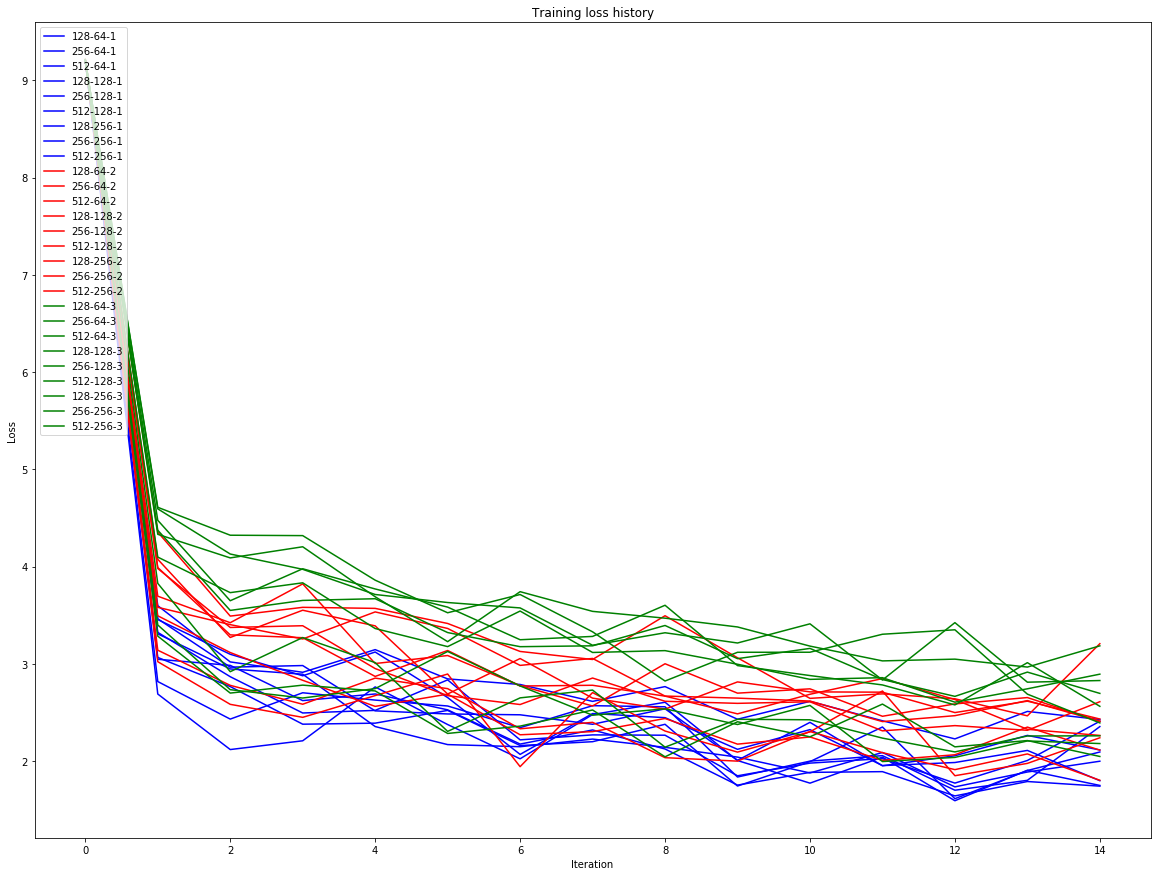

In [3]:
mypath = path + 'size_lstm.txt'
print mypath
plot(mypath, color_by=3)

./output_slurm/size_gru.txt
[9.207, 3.1728, 2.8178, 2.3406, 2.4786, 2.8906, 2.4203, 2.5048, 2.2888, 1.982, 2.0403, 2.3108, 1.8111, 2.0911, 2.377]
[9.1983, 2.8477, 2.8757, 2.4123, 2.2828, 2.6684, 1.9792, 2.0976, 2.2298, 1.8525, 1.9872, 2.1481, 1.8006, 1.8873, 2.1169]
[9.2105, 2.961, 2.1018, 2.1325, 2.2384, 2.9246, 1.8522, 2.26, 2.1912, 1.6657, 1.9483, 1.816, 1.4384, 1.7287, 1.7143]
[9.2093, 2.7836, 2.6336, 2.5355, 2.3705, 2.8831, 1.8374, 2.2981, 2.4463, 2.0642, 1.9324, 2.6407, 1.7347, 2.0109, 2.2775]
[9.2139, 3.1789, 2.7016, 2.3157, 2.3031, 2.2035, 1.8315, 2.1904, 2.1688, 1.6978, 1.8583, 1.8617, 1.7992, 2.0301, 2.1082]
[9.2112, 3.2873, 2.6557, 2.2678, 2.891, 2.7631, 2.2138, 2.0722, 2.3419, 2.0821, 2.4423, 2.2258, 1.9883, 2.1073, 2.1284]
[9.2233, 2.8575, 2.9011, 2.3215, 2.7303, 2.427, 1.9166, 2.165, 2.2783, 1.9423, 1.974, 2.0696, 1.7881, 1.7158, 2.4176]
[9.2109, 2.7631, 3.0763, 2.3072, 2.269, 2.6103, 2.0384, 2.2095, 2.2239, 1.71, 1.9794, 2.4814, 1.7426, 1.8036, 1.9068]
[9.196, 3.7955, 3.

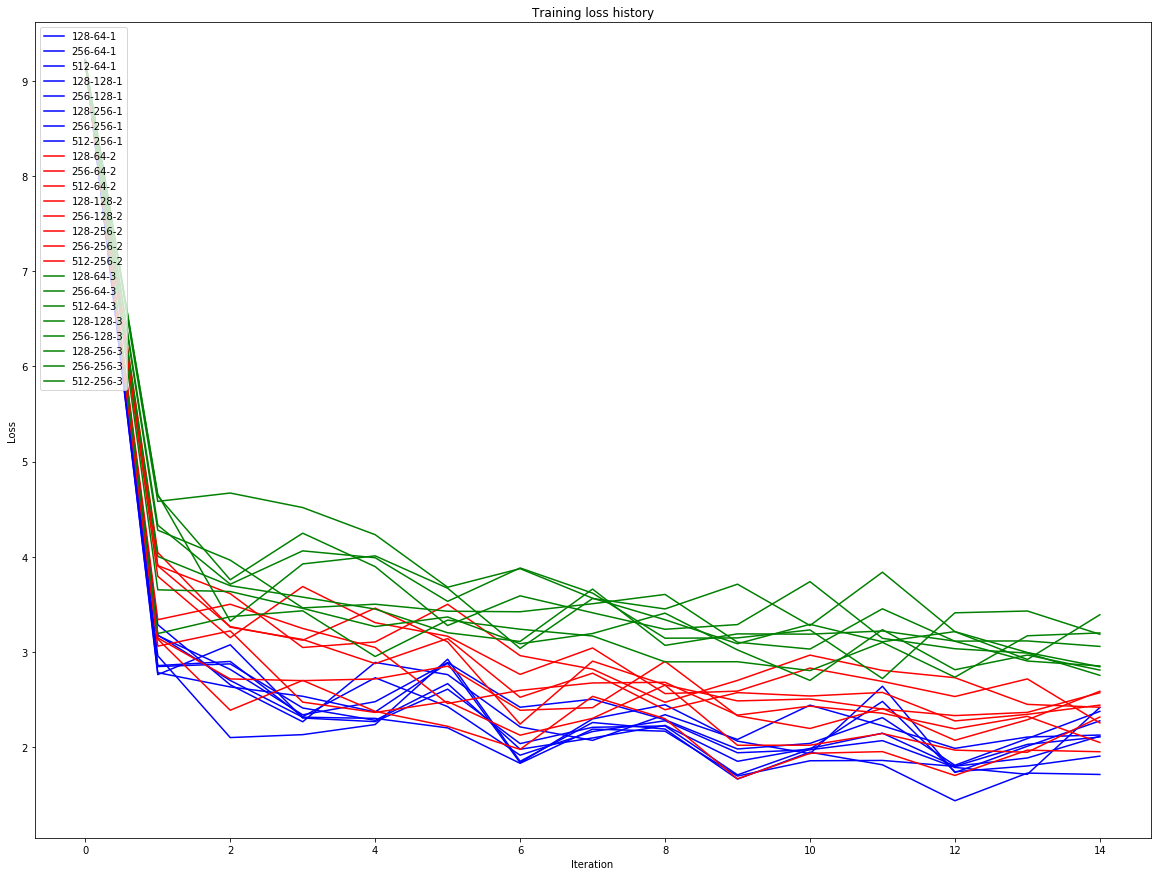

In [4]:
mypath = path + 'size_gru.txt'
print mypath
plot(mypath, color_by=3)

In [5]:
def plot_lr(log):   
    #     for fn in filenames:
    idx2Arg2Loss = defaultdict(dict);
    i = 0;
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history')
    pltlog = []
    with (open(log, 'r')) as handle:
        for line in handle:
    #         print line
            if ('Namespace' in line):
                #first line
                i+=1;
                idx2Arg2Loss[i] = {'arg':'','loss':[],'time':[]};
            if ('embed_size' in line) or ('hidden_size' in line) or ('num_layer' in line):
                idx2Arg2Loss[i]['arg'] += line
            elif ('Epoch' in line):
                spl = line.split(",");
                lossStr = find(spl, 'Loss');
                timeStr = find(spl, 'Time');
                loss = getVal(lossStr)
                time = getVal(timeStr)
                idx2Arg2Loss[i]['loss'].append(loss);
                idx2Arg2Loss[i]['time'].append(time);

        for k, v in idx2Arg2Loss.iteritems():
#             a,b,c = get_size_param(v['arg'])
#             print a,b,c
            print v['arg']
            lr = get_lr_param(v['arg'])
            print str(lr)
            pltlog.append('%s'%(str(lr)));
            if k == 6: continue;
            print 'TIME: ', v['time'][-1]
            print '----------'
            plt.plot(v['loss'])
        plt.legend(pltlog, loc='upper left')
        plt.show()


./output_slurm/lr_lstm.txt
Namespace(batch_size=25, caption_path='./coco/annotations/sm_captions_train2014.json', crop_size=224, embed_size=256, hidden_size=512, image_dir='./data/resized2014', learning_rate=1e-05, log_step=50, model_path='./models/EXP2_LR', num_epochs=5, num_layers=1, num_workers=2, save_step=500, vocab_path='./data/vocab.pkl')

1e-05
TIME:  1042.2361
----------
Namespace(batch_size=25, caption_path='./coco/annotations/sm_captions_train2014.json', crop_size=224, embed_size=256, hidden_size=512, image_dir='./data/resized2014', learning_rate=0.0001, log_step=50, model_path='./models/EXP2_LR', num_epochs=5, num_layers=1, num_workers=2, save_step=500, vocab_path='./data/vocab.pkl')

0.0001
TIME:  1041.9202
----------
Namespace(batch_size=25, caption_path='./coco/annotations/sm_captions_train2014.json', crop_size=224, embed_size=256, hidden_size=512, image_dir='./data/resized2014', learning_rate=0.001, log_step=50, model_path='./models/EXP2_LR', num_epochs=5, num_layers=1,

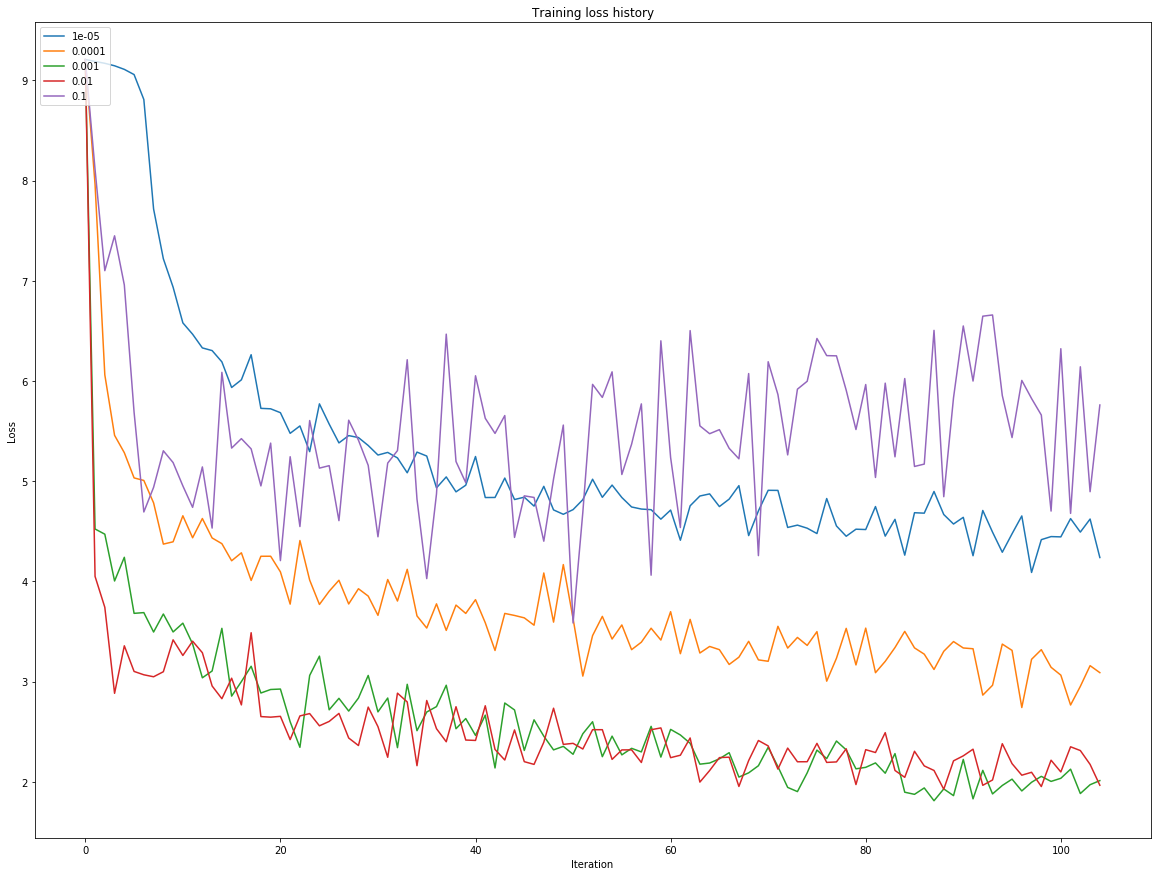

In [6]:
mypath = path + 'lr_lstm.txt'
print mypath
plot_lr(mypath)

./output_slurm/lr_gru.txt
Namespace(batch_size=25, caption_path='./coco/annotations/sm_captions_train2014.json', crop_size=224, embed_size=128, hidden_size=256, image_dir='./data/resized2014', learning_rate=1e-05, log_step=500, model_path='./models/GRU_LR', num_epochs=5, num_layers=1, num_workers=2, save_step=500, vocab_path='./data/vocab.pkl')

1e-05
TIME:  1018.7187
----------
Namespace(batch_size=25, caption_path='./coco/annotations/sm_captions_train2014.json', crop_size=224, embed_size=128, hidden_size=256, image_dir='./data/resized2014', learning_rate=0.0001, log_step=500, model_path='./models/GRU_LR', num_epochs=5, num_layers=1, num_workers=2, save_step=500, vocab_path='./data/vocab.pkl')

0.0001
TIME:  1044.7878
----------
Namespace(batch_size=25, caption_path='./coco/annotations/sm_captions_train2014.json', crop_size=224, embed_size=128, hidden_size=256, image_dir='./data/resized2014', learning_rate=0.001, log_step=500, model_path='./models/GRU_LR', num_epochs=5, num_layers=1, 

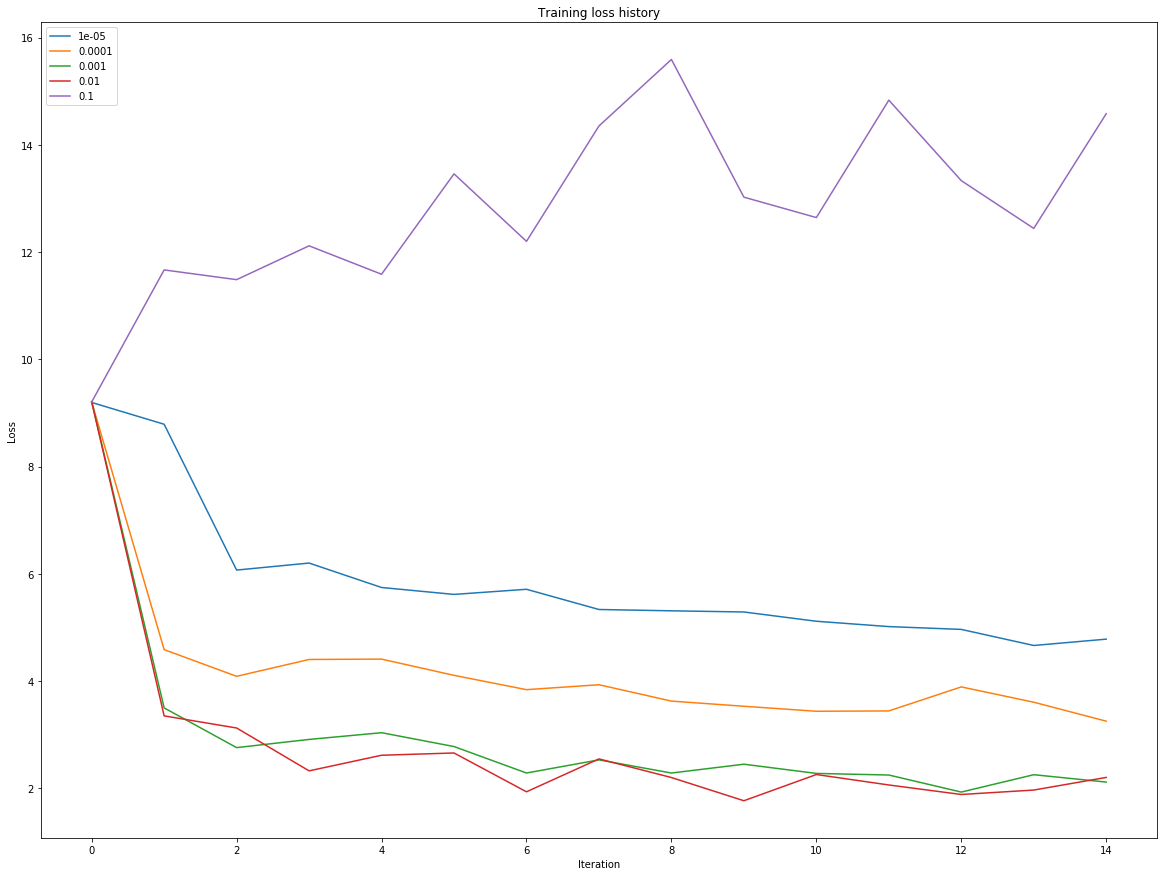

In [7]:
def plot_gru_lr(log):   
    #     for fn in filenames:
    idx2Arg2Loss = defaultdict(dict);
    i = 0;
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history')
    pltlog = []
    with (open(log, 'r')) as handle:
        for line in handle:
    #         print line
            if ('Namespace' in line):
                #first line
                i+=1;
                idx2Arg2Loss[i] = {'arg':'','loss':[],'time':[]};
            if ('embed_size' in line) or ('hidden_size' in line) or ('num_layer' in line):
                idx2Arg2Loss[i]['arg'] += line
            elif ('Epoch' in line):
                spl = line.split(",");
                lossStr = find(spl, 'Loss');
                timeStr = find(spl, 'Time');
                loss = getVal(lossStr)
                time = getVal(timeStr)
                idx2Arg2Loss[i]['loss'].append(loss);
                idx2Arg2Loss[i]['time'].append(time);

        for k, v in idx2Arg2Loss.iteritems():
#             a,b,c = get_size_param(v['arg'])
#             print a,b,c
            if k == 6: continue;
            print v['arg']
            lr = get_lr_param(v['arg'])
            print str(lr)
            pltlog.append('%s'%(str(lr)));
            print 'TIME: ', v['time'][-1]
            print '----------'

            plt.plot(v['loss'])
        plt.legend(pltlog, loc='upper left')
        plt.show()
mypath = path + 'lr_gru.txt'
print mypath
plot_gru_lr(mypath)

### Attention Loss


./evaluation/1_att_log.txt
Namespace(batch_size=20, caption_path='./coco/annotations/sm_captions_train2014.json', crop_size=224, embed_size=256, hidden_size=512, image_dir='./data/resized2014', learning_rate=0.001, log_step=50, model_path='./models/ATT', num_epochs=5, num_layers=1, num_workers=2, save_step=10, vocab_path='./data/vocab.pkl')
emb_size(M):  256 hid_size(H):  512 voc_size(V):  9956 L:  49 D:  2048 num_layers:



AttributeError: 'list' object has no attribute 'split'

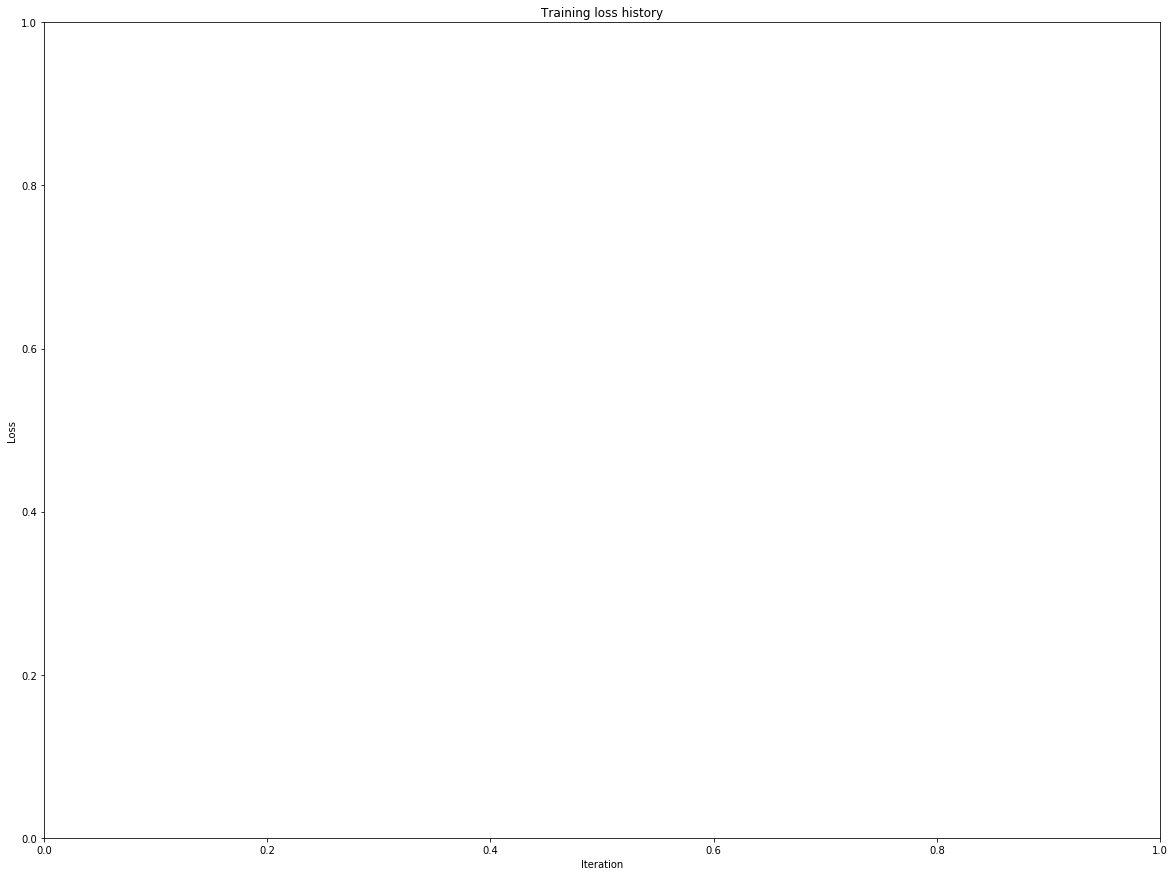

In [8]:
mypath = './evaluation/1_att_log.txt'
print mypath
plot_lr(mypath)